In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/MESTRADO/2022 - S2/Implementação - Artigo AINA/Dataset/urldata-1000.csv'

In [4]:
data = pd.read_csv(dataset, encoding='ISO-8859-1')
data.head()

,url,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,...,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,mean_degree,density,avg_clustering,transitivity,network_efficiency,Label
0,https://www.apple.com/,apple.com,0,0,0,0,0,0,0,0,...,0,1,0,0,46.916667,0.493860,0.778458,0.745666,0.733955,0
1,https://www.google.com/,google.com,0,0,0,0,0,0,0,0,...,0,131,0,0,4.777778,0.281046,0.559656,0.644860,0.480392,0
2,https://www.youtube.com/,youtube.com,0,0,0,0,0,0,0,0,...,0,131,0,0,8.166667,0.742424,0.786508,0.840659,0.863636,0
3,https://www.blogger.com/about/?bpli=1,blogger.com,0,0,0,1,0,0,0,0,...,0,4,0,0,13.466667,0.961905,0.967277,0.965217,0.980952,0
4,https://www.microsoft.com/pt-br/,microsoft.com,0,0,0,1,0,0,1,0,...,0,115,0,0,34.888889,0.392010,0.793991,0.869983,0.572468,0


In [5]:
#Checking the shape of the dataset
data.shape

(1000, 32)

In [6]:
#Listing the features of the dataset
data.columns

Index(['url', 'Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'versionSSL', 'serialNumberSSL',
       'expirationDateSSL', 'startDateSSL', 'validCert', 'subjectAltNameSSL',
       'subjectNameSSL', 'issuerNameSSL', 'mean_degree', 'density',
       'avg_clustering', 'transitivity', 'network_efficiency', 'Label'],
      dtype='object')

In [7]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1000 non-null   object 
 1   Domain              999 non-null    object 
 2   Have_IP             1000 non-null   int64  
 3   Have_At             1000 non-null   int64  
 4   URL_Length          1000 non-null   int64  
 5   URL_Depth           1000 non-null   int64  
 6   Redirection         1000 non-null   int64  
 7   https_Domain        1000 non-null   int64  
 8   TinyURL             1000 non-null   int64  
 9   Prefix/Suffix       1000 non-null   int64  
 10  DNS_Record          1000 non-null   int64  
 11  Web_Traffic         1000 non-null   int64  
 12  Domain_Age          1000 non-null   int64  
 13  Domain_End          1000 non-null   int64  
 14  iFrame              1000 non-null   int64  
 15  Mouse_Over          1000 non-null   int64  
 16  Right_C

In [8]:
#Dropping the Domain column
data = data.drop(['url', 'Domain', 'mean_degree', 'density', 'avg_clustering', 'transitivity', 'network_efficiency'], axis = 1).copy()

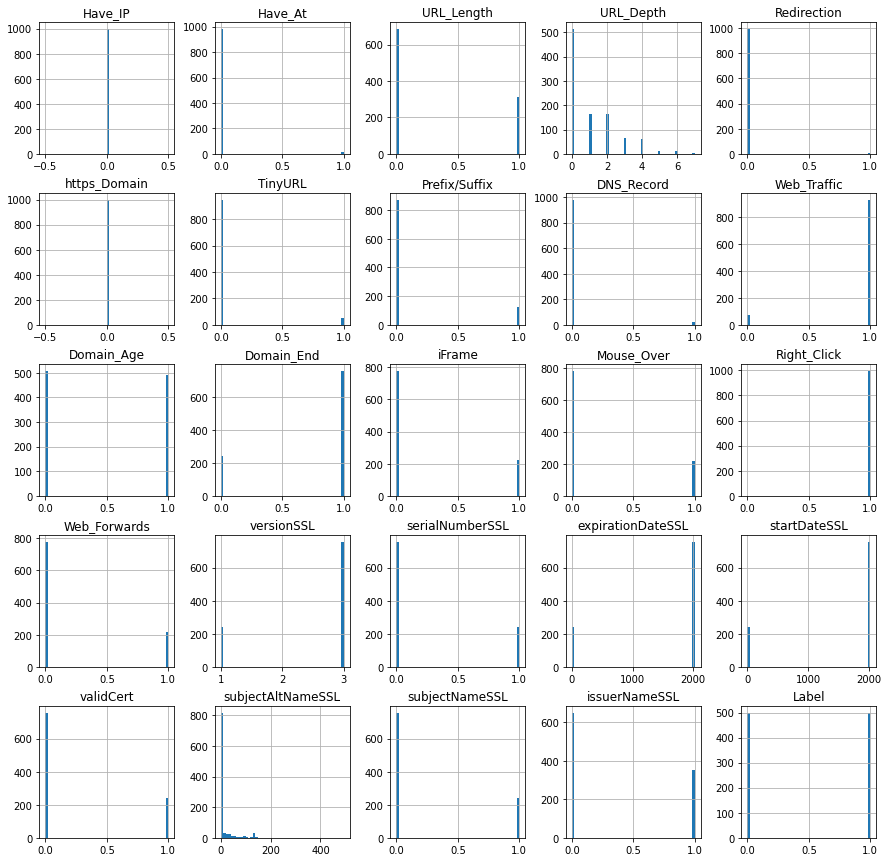

In [9]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

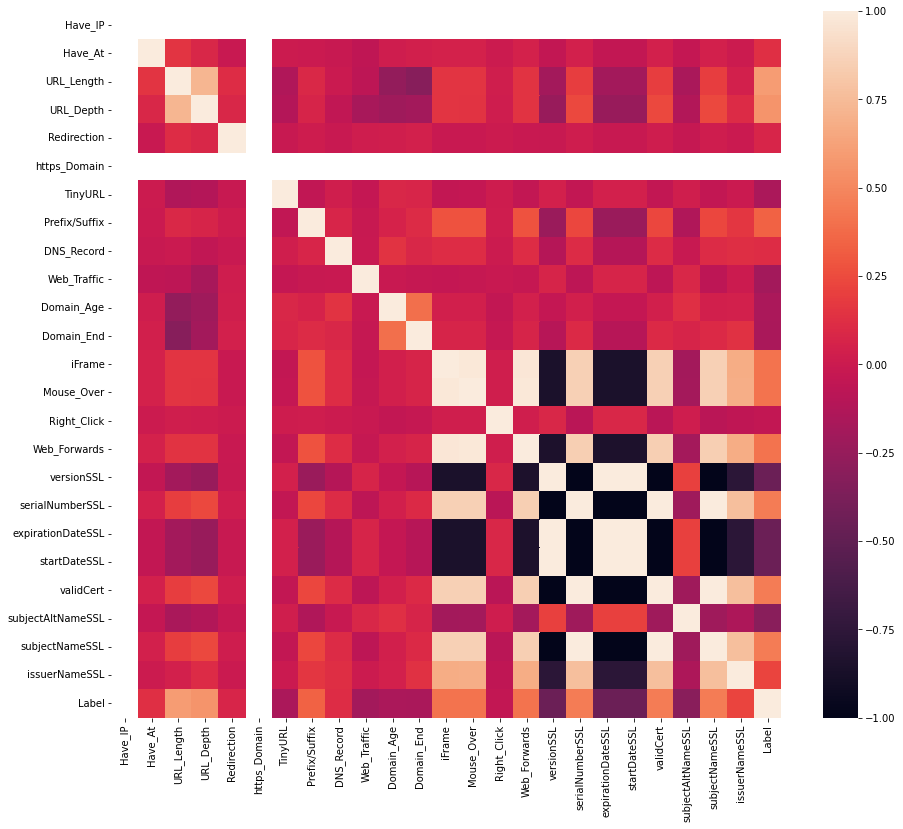

In [10]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
sns.set(font_scale = 1) # tamanho da fonte do gráfico
#plt.show()

#figure = a.get_figure()    
plt.savefig('correlation-matrix.pdf', bbox_inches='tight')

In [11]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,Web_Forwards,versionSSL,serialNumberSSL,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,Label
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.0,0.016000,0.313000,1.093000,0.006000,0.0,0.053000,0.12700,0.02000,0.927000,...,0.220000,2.516000,0.242000,1533.453000,1532.86800,0.242000,14.621000,0.242000,0.350000,0.50000
std,0.0,0.125538,0.463946,1.449984,0.077266,0.0,0.224146,0.33314,0.14007,0.260267,...,0.414454,0.857017,0.428509,866.318413,865.98764,0.428509,36.567397,0.428509,0.477208,0.50025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,3.000000,0.000000,2022.000000,2021.00000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,3.000000,0.000000,2023.000000,2022.00000,0.000000,2.000000,0.000000,0.000000,0.50000
75%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.00000,0.00000,1.000000,...,0.000000,3.000000,0.000000,2023.000000,2022.00000,0.000000,6.000000,0.000000,1.000000,1.00000
max,0.0,1.000000,1.000000,7.000000,1.000000,0.0,1.000000,1.00000,1.00000,1.000000,...,1.000000,3.000000,1.000000,2023.000000,2022.00000,1.000000,493.000000,1.000000,1.000000,1.00000


In [12]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP              0
Have_At              0
URL_Length           0
URL_Depth            0
Redirection          0
https_Domain         0
TinyURL              0
Prefix/Suffix        0
DNS_Record           0
Web_Traffic          0
Domain_Age           0
Domain_End           0
iFrame               0
Mouse_Over           0
Right_Click          0
Web_Forwards         0
versionSSL           0
serialNumberSSL      0
expirationDateSSL    0
startDateSSL         0
validCert            0
subjectAltNameSSL    0
subjectNameSSL       0
issuerNameSSL        0
Label                0
dtype: int64

In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,...,Web_Forwards,versionSSL,serialNumberSSL,expirationDateSSL,startDateSSL,validCert,subjectAltNameSSL,subjectNameSSL,issuerNameSSL,Label
0,0,0,0,0,0,0,0,0,0,1,...,0,3,0,2022,2022,0,9,0,0,0
1,0,0,1,2,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,3,0,2023,2022,0,54,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,3,0,2023,2022,0,82,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,3,0,2023,2022,0,2,0,1,1


In [14]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 24), (1000,))

In [15]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 12)
X_train.shape, X_test.shape

((700, 24), (300, 24))

In [16]:
#importing packages
from sklearn.metrics import accuracy_score

In [17]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [18]:
import datetime
import time

**1. Decision Tree Classifier**

In [19]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
tree.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.003053 seconds


In [20]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.006087 seconds


In [21]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.4f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.4f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9171
Decision Tree: Accuracy on test Data: 0.9133


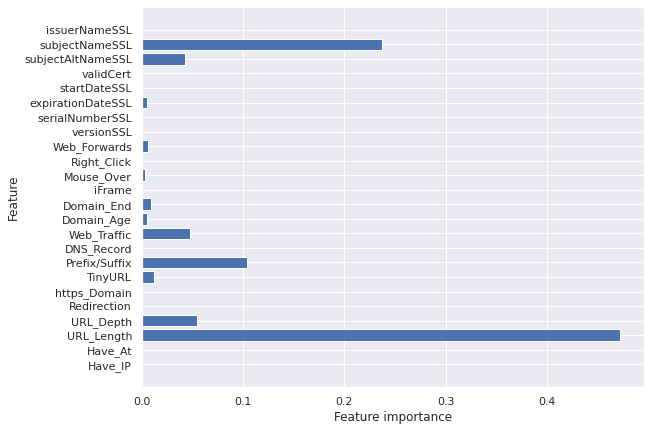

In [22]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [23]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
cm = confusion_matrix(y_test,y_test_tree)
cm

array([[137,  13],
       [ 13, 137]])

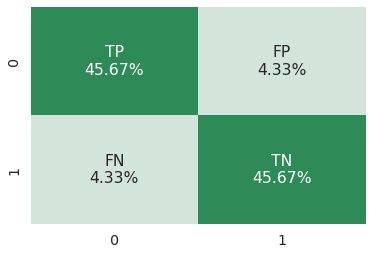

In [26]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('2-cenario-matriz-decisiontree.pdf', bbox_inches='tight')

In [27]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_tree, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9133    0.9133    0.9133       150
class 1: phishing     0.9133    0.9133    0.9133       150

         accuracy                         0.9133       300
        macro avg     0.9133    0.9133    0.9133       300
     weighted avg     0.9133    0.9133    0.9133       300



In [28]:
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,average_precision_score, accuracy_score

In [29]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_tree)
test_ap = average_precision_score(y_test,y_test_tree)
test_ac = accuracy_score(y_test, y_test_tree.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9133
Test Average Precision Score = 0.8775
Test Accuracy Score = 0.9133


In [30]:
fpr, tpr, thresholds = roc_curve(y_test_tree, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_tree, y_test)
auc_roc = auc(fpr, tpr)

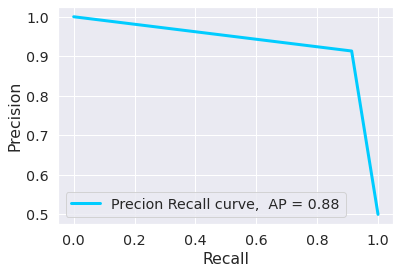

In [31]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-decision-tree.pdf', bbox_inches='tight')

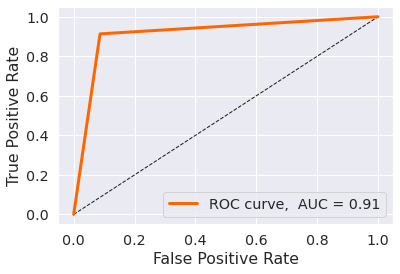

In [32]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('2-cenario-roc-decision-tree.pdf', bbox_inches='tight')

**2. Random Forest Classifier**

In [33]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# get the start datetime
st = datetime.datetime.now()

# fit the model 
forest.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.156955 seconds


In [34]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.049250 seconds


In [35]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.4f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.4f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9157
Random forest: Accuracy on test Data: 0.9233


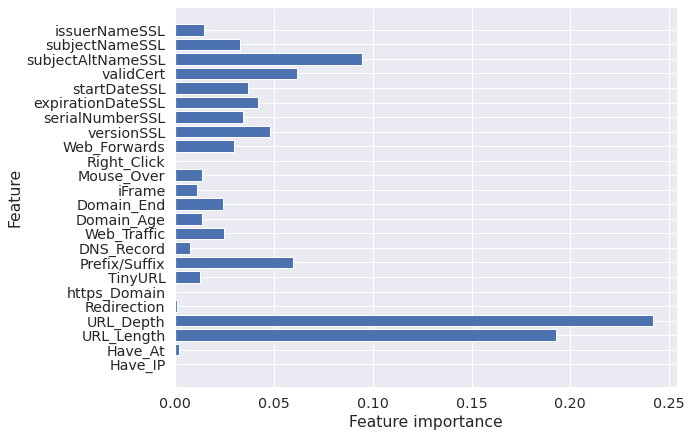

In [36]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [37]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [38]:
cm = confusion_matrix(y_test,y_test_forest)
cm

array([[138,  12],
       [ 11, 139]])

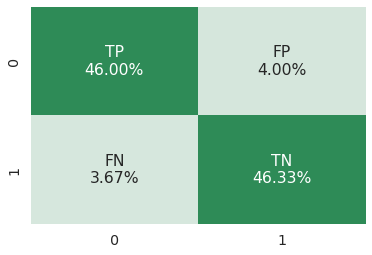

In [39]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('2-matriz-randomforest.pdf', bbox_inches='tight')

In [40]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_forest, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9262    0.9200    0.9231       150
class 1: phishing     0.9205    0.9267    0.9236       150

         accuracy                         0.9233       300
        macro avg     0.9234    0.9233    0.9233       300
     weighted avg     0.9234    0.9233    0.9233       300



In [41]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_forest)
test_ap = average_precision_score(y_test,y_test_forest)
test_ac = accuracy_score(y_test, y_test_forest.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9233
Test Average Precision Score = 0.8897
Test Accuracy Score = 0.9233


In [42]:
fpr, tpr, thresholds = roc_curve(y_test_forest, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_forest, y_test)
auc_roc = auc(fpr, tpr)

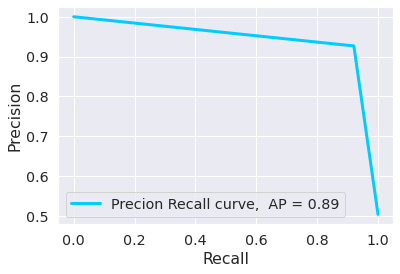

In [43]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
  
plt.savefig('pr-random-forest.pdf', bbox_inches='tight')

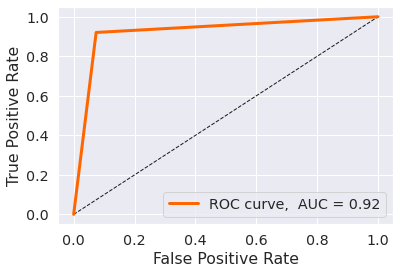

In [44]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('2-cenario-roc-random-forest.pdf', bbox_inches='tight')

**3. Multilayer Perceptrons (MLPs)**

In [45]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# get the start datetime
st = datetime.datetime.now()

# fit the model 
mlp.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.576302 seconds


In [46]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.017375 seconds


In [47]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.4f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.4f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.5929
Multilayer Perceptrons: Accuracy on test Data: 0.6000


In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [49]:
cm = confusion_matrix(y_test,y_test_mlp)
cm

array([[ 30, 120],
       [  0, 150]])

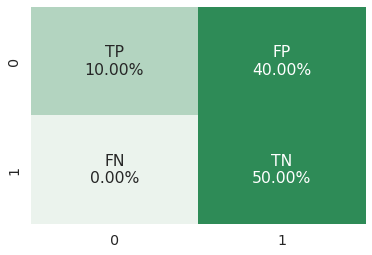

In [50]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('2-cenario-matriz-mlp.pdf', bbox_inches='tight')

In [51]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_mlp, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     1.0000    0.2000    0.3333       150
class 1: phishing     0.5556    1.0000    0.7143       150

         accuracy                         0.6000       300
        macro avg     0.7778    0.6000    0.5238       300
     weighted avg     0.7778    0.6000    0.5238       300



In [52]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_mlp)
test_ap = average_precision_score(y_test,y_test_mlp)
test_ac = accuracy_score(y_test, y_test_mlp.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.6000
Test Average Precision Score = 0.5556
Test Accuracy Score = 0.6000


In [53]:
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_mlp, y_test)
auc_roc = auc(fpr, tpr)

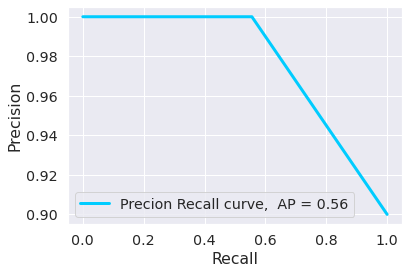

In [54]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
    
plt.savefig('pr-mlp.pdf', bbox_inches='tight')

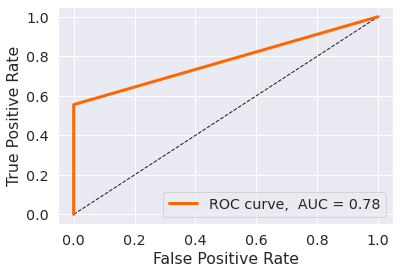

In [55]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()
 
plt.savefig('2-cenario-roc-mlp.pdf', bbox_inches='tight')

**4. XGBoost Classifier**

In [56]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

# get the start datetime
st = datetime.datetime.now()

#fit the model
xgb.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.251824 seconds


In [57]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.014653 seconds


In [58]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.4f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.4f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9729
XGBoost : Accuracy on test Data: 0.9233


In [59]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [60]:
cm = confusion_matrix(y_test,y_test_xgb)
cm

array([[139,  11],
       [ 12, 138]])

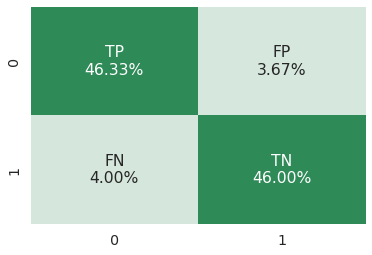

In [61]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('2-cenario-matriz-xgboost.pdf', bbox_inches='tight')

In [62]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_xgb, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9205    0.9267    0.9236       150
class 1: phishing     0.9262    0.9200    0.9231       150

         accuracy                         0.9233       300
        macro avg     0.9234    0.9233    0.9233       300
     weighted avg     0.9234    0.9233    0.9233       300



In [63]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_xgb)
test_ap = average_precision_score(y_test,y_test_xgb)
test_ac = accuracy_score(y_test, y_test_xgb.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9233
Test Average Precision Score = 0.8921
Test Accuracy Score = 0.9233


In [64]:
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_xgb, y_test)
auc_roc = auc(fpr, tpr)

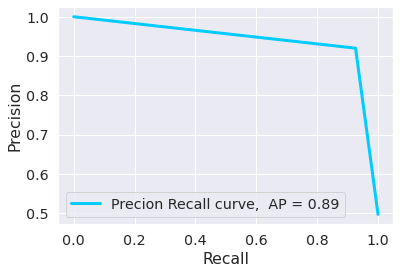

In [65]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()

plt.savefig('pr-xgboost.pdf', bbox_inches='tight')

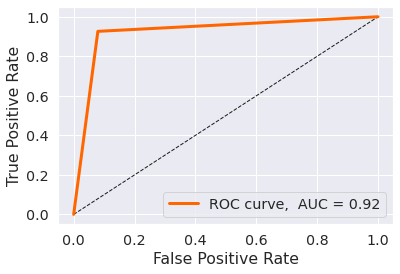

In [66]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('2-cenario-roc-xgboost.pdf', bbox_inches='tight')

**5. Support Vector Machines**

In [67]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# get the start datetime
st = datetime.datetime.now()

#fit the model
svm.fit(X_train, y_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Train:', elapsed_time, 'seconds')

Execution time Train: 0:00:00.101086 seconds


In [68]:
# get the start datetime
st = datetime.datetime.now()

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# get the end datetime
et = datetime.datetime.now()

# get execution time
elapsed_time = et - st
print('Execution time Test:', elapsed_time, 'seconds')

Execution time Test: 0:00:00.012138 seconds


In [69]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.4f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.4f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9071
SVM : Accuracy on test Data: 0.9067


In [70]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [71]:
cm = confusion_matrix(y_test,y_test_svm)
cm

array([[136,  14],
       [ 14, 136]])

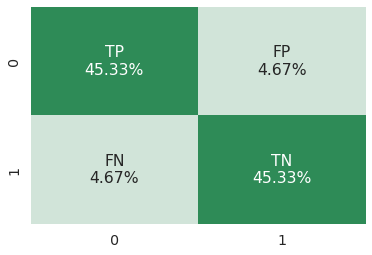

In [73]:
# Matriz de confusão padronizada (sem legenda de cores)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale = 1.3) # tamanho da fonte do gráfico

group_names = ['TP','FP','FN','TN']
#group_counts = ['{0:0.0f}'.format(value) for value in
                #cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, vmin=0, vmax=100, cbar=False)

figure = a.get_figure()    
plt.savefig('2-cenario-matriz-svm.pdf', bbox_inches='tight')

In [74]:
target_names = ['class 0: true', 'class 1: phishing']

print("Métricas do modelo:")
print(classification_report(y_test,y_test_svm, target_names=target_names, digits=4))

Métricas do modelo:
                   precision    recall  f1-score   support

    class 0: true     0.9067    0.9067    0.9067       150
class 1: phishing     0.9067    0.9067    0.9067       150

         accuracy                         0.9067       300
        macro avg     0.9067    0.9067    0.9067       300
     weighted avg     0.9067    0.9067    0.9067       300



In [75]:
# Métricas analisadas

test_roc = roc_auc_score(y_test, y_test_svm)
test_ap = average_precision_score(y_test,y_test_svm)
test_ac = accuracy_score(y_test, y_test_svm.round())
print("Test ROC AUC Score = {:.4f}\nTest Average Precision Score = {:.4f}\nTest Accuracy Score = {:.4f}".format(test_roc,test_ap, test_ac))

Test ROC AUC Score = 0.9067
Test Average Precision Score = 0.8687
Test Accuracy Score = 0.9067


In [76]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test, pos_label=1)
precision, recall, _ = precision_recall_curve(y_test_svm, y_test)
auc_roc = auc(fpr, tpr)

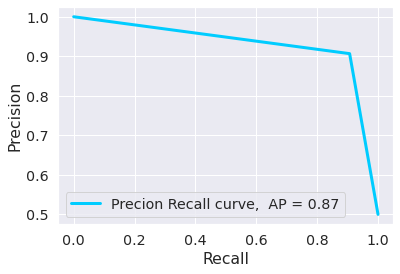

In [77]:
# Mostrando a curva precision-recall para o dataset de teste
plt.plot(recall, precision, label='Precion Recall curve,  AP = %0.2f' %test_ap,
            color = '#00ccff',linewidth=3.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=3)
#plt.show()
 
plt.savefig('pr-svm.pdf', bbox_inches='tight')

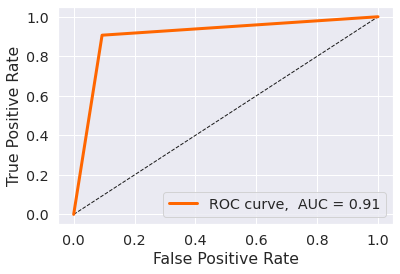

In [78]:
# Mostrando a curva ROC para o dataset de teste
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.0)
plt.plot(fpr, tpr, label='ROC curve,  AUC = %0.2f' %auc_roc, color='#ff6600', 
            linewidth=3.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
#plt.show()

plt.savefig('2-cenario-roc-svm.pdf', bbox_inches='tight')

**Comparision of Models**

In [79]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.917,0.913
1,Random Forest,0.916,0.923
2,Multilayer Perceptrons,0.593,0.600
3,XGBoost,0.973,0.923
4,SVM,0.907,0.907


In [80]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.973,0.923
1,Random Forest,0.916,0.923
0,Decision Tree,0.917,0.913
4,SVM,0.907,0.907
2,Multilayer Perceptrons,0.593,0.600
